# DSA

## Fundamentos de Linguagem Python para Análise de Dados e Data Science

### Análise Estatística com Statemodels

Problema de Negócio:

Existe alguma relação entre a área de imóveis (em m²) e o valor do aluguel em uma determinada cidade ?
Caso exista tal relação, como podemos mensurá-la de modo adequado ?

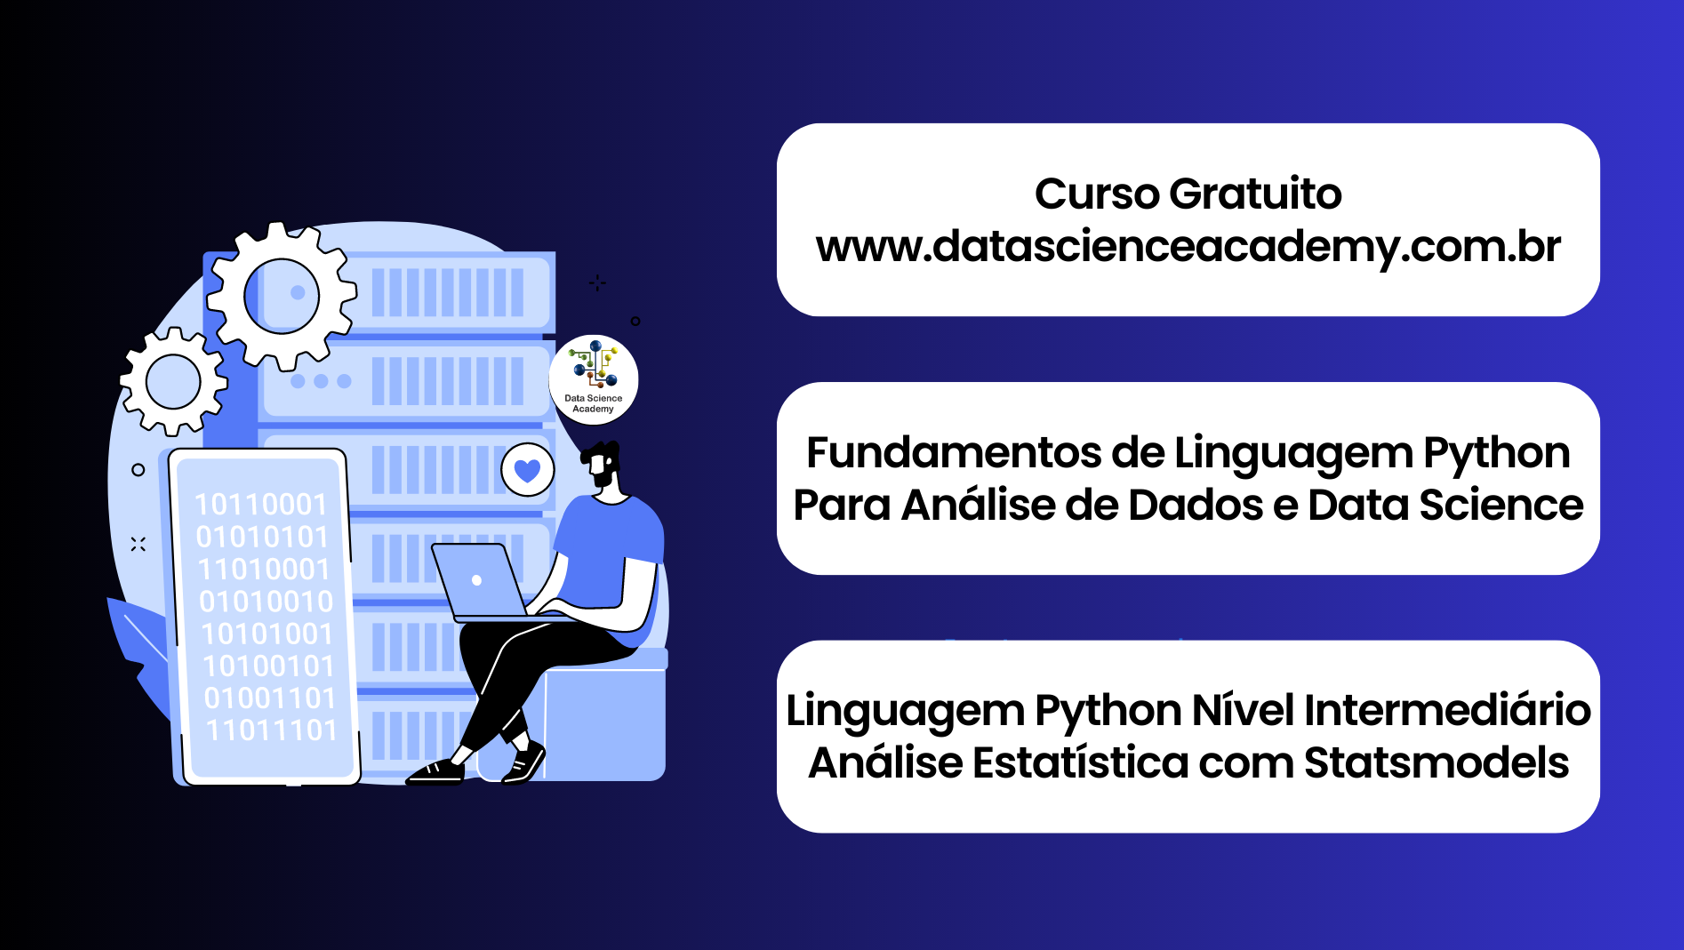

In [1]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import statsmodels.api as sm

### Carregando os Dados

In [2]:
# Carrega o dataset
df_dsa = pd.read_csv('dataset.csv')

In [3]:
df_dsa.shape

(3000, 7)

In [4]:
df_dsa

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222
...,...,...,...,...,...,...,...
2995,560.20514,68,1981,2,0,0,731
2996,454.00000,56,1970,1,0,0,1712
2997,218.56410,76,1939,1,0,0,1014
2998,739.84610,49,1994,2,1,1,1853


In [5]:
df_dsa.columns

Index(['valor_aluguel', 'area_m2', 'ano_construcao', 'codigo_localidade',
       'numero_banheiros', 'numero_cozinhas', 'codigo_bairro'],
      dtype='object')

In [6]:
df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   valor_aluguel      3000 non-null   float64
 1   area_m2            3000 non-null   int64  
 2   ano_construcao     3000 non-null   int64  
 3   codigo_localidade  3000 non-null   int64  
 4   numero_banheiros   3000 non-null   int64  
 5   numero_cozinhas    3000 non-null   int64  
 6   codigo_bairro      3000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 164.2 KB


### Análise Exploratória - Resumo Estatístico

In [7]:
# Resumo estatístico do dataset - ATENÇÃO
df_dsa.describe()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,459.643146,67.363333,1956.321333,1.441000,0.061333,0.042000,1173.798667
std,195.865692,23.675758,22.288136,0.545238,0.239981,0.200623,678.187690
min,40.512820,20.000000,1918.000000,1.000000,0.000000,0.000000,113.000000
25%,320.961530,51.000000,1939.000000,1.000000,0.000000,0.000000,561.750000
50%,426.897435,65.000000,1959.000000,1.000000,0.000000,0.000000,1025.000000
75%,560.282055,81.000000,1972.000000,2.000000,0.000000,0.000000,1714.000000
max,1843.384600,160.000000,1997.000000,3.000000,1.000000,1.000000,2529.000000


In [8]:
# Verifica se há valores ausentes
df_dsa.isnull().sum()

valor_aluguel        0
area_m2              0
ano_construcao       0
codigo_localidade    0
numero_banheiros     0
numero_cozinhas      0
codigo_bairro        0
dtype: int64

In [9]:
# Resumo estatístico do variável alvo
df_dsa['valor_aluguel'].describe()

count    3000.000000
mean      459.643146
std       195.865692
min        40.512820
25%       320.961530
50%       426.897435
75%       560.282055
max      1843.384600
Name: valor_aluguel, dtype: float64

<Axes: xlabel='valor_aluguel', ylabel='Count'>

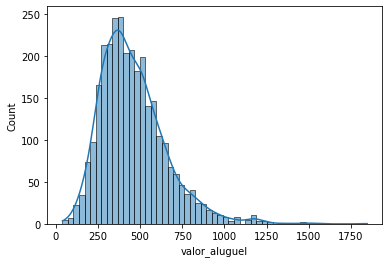

In [10]:
# Histograma da variável alvo
sea.histplot(data = df_dsa, x = 'valor_aluguel', kde = True)

In [11]:
# Correlação entre as variáveis
df_dsa.corr()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
valor_aluguel,1.000000,0.584878,0.139194,0.172368,0.250261,0.170707,-0.020846
area_m2,0.584878,1.000000,-0.226581,0.110046,0.226306,0.045716,-0.089050
ano_construcao,0.139194,-0.226581,1.000000,-0.152206,0.065824,0.109881,0.327983
codigo_localidade,0.172368,0.110046,-0.152206,1.000000,0.037858,-0.004774,-0.282528
numero_banheiros,0.250261,0.226306,0.065824,0.037858,1.000000,0.064216,0.043600
numero_cozinhas,0.170707,0.045716,0.109881,-0.004774,0.064216,1.000000,0.029495
codigo_bairro,-0.020846,-0.089050,0.327983,-0.282528,0.043600,0.029495,1.000000


O coef. de correlação é uma medida estatística que indica a força e a direção da relação entre duas variáveis numéricas:

Um coef. :
- = 1 indica correlação linear perfeita +
- = -1 indica correlação linear perfeita - 
- =0 sugere que não há correlação entre as variáveis.

O coef de correlação mais comum é o de Pearson que mede a correlação entre duas variáveis. Existem outras medidas de correlação, como o coef. de correlação de Spearman, que avalia a relação monotônica entre duas variáveis, e o coeficiente de correlação de Kendall, que consiste a concordância entre rankings das variáveis.

<Axes: xlabel='area_m2', ylabel='valor_aluguel'>

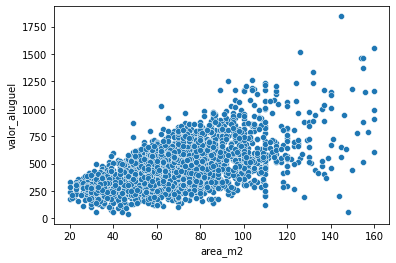

In [12]:
# Vamos analisar a relação entre a variável de entrada area_m² e a variável alvo valor_aluguel
sea.scatterplot(data = df_dsa, x = 'area_m2', y = 'valor_aluguel')

### Regressão Linear Simples

...

### Construção do Modelo OLS (Ordinary Least Squares) com Statsmodels em Python

In [13]:
df_dsa.head()

,valor_aluguel,area_m2,ano_construcao,codigo_localidade,numero_banheiros,numero_cozinhas,codigo_bairro
0,120.97436,35,1939,1,0,0,1112
1,436.97433,104,1939,1,1,0,1112
2,355.74360,29,1971,2,0,0,2114
3,282.92310,39,1972,2,0,0,2148
4,807.23080,97,1985,1,0,0,2222


In [14]:
# Definimos a variável independente
y = df_dsa['valor_aluguel']

In [19]:
# Definindo a variável independente
x = df_dsa['area_m2']

In [20]:
# O Statsmodels requer a adição de uma constante à variável independente
X = sm.add_constant(x)

In [22]:
# Criamos o modelo
modelo = sm.OLS(y, X)

O método sm.OLS(y, X) é uma função do pacote Statsmodels, biblioteca Python utiliada para análise estatística. A FÇ OLS (Ordinary Least Squares) é usadas para ajustar um modelo de regressão linear, minimizando a soma dos erros quadráticos entre os valores observados e os valores previstos pelo modelo.

A FÇ sm.OLS(y, X) recebe dois argumentos principais:

y: Um array ou pandas Series representando a variável dependente (variável ou alvo). É a variável que você desejar prever ou explicar com base nas variáveis independentes.

X: Um array ou pandas DataFrame representando a variáveis independentes (variáveis explicativas ou preditorias). São as variáveis que vc deseja usar para explicar ou prever a variável dependente.

https://www.statsmodels.org/dev/generated/statesmodels.regression.linear.model.OLS.html

In [23]:
# Treinamento do modelo
resultado = modelo.fit()

In [24]:
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:          valor_aluguel   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     1559.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):          6.84e-275
Time:                        17:25:10   Log-Likelihood:                -19461.
No. Observations:                3000   AIC:                         3.893e+04
Df Residuals:                    2998   BIC:                         3.894e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.6988      8.750     15.279      0.0

### Interpretando o Resultado do Modelo Estatístico com Statsmodels


A tabela acima traz um resultado do modelo com diversas estatísticas. Aqui faremos a análise de uma delas, o R².

O coef. de determinação, também conhecido como R², é uma medida estatística que avalia o quão bem o modelo de regressão se ajusta aos dados observados. Ele varia de 0 a 1 e representa a proporção da variação total dependente que é explicada pelo modelo de regressão.

A interpretação do R² é a seguinte:

R²= 0: Neste caso, o modelo de regressão não explique nenhuma variação na variável dependente. Isso significa que o modelo não é útil para prever ou explicar a variável de interesse.

0 < R² < 1: Neste caso, o modelo de regressão explica uma parte da variação na varíavel dependente. Quanto maior o valor de R², melhor o modelo se ajusta aos dados e melhor é a sua capacidade de prever ou explicar a variável de interesse.

É importante notar que um R² alto não garante que o modelo seja adequado, nem que haja uma relação, causal entre as variáveis. Um R² alto pode ser resultado de variáveis irrelevantes, multicolinearidade ou até mesmo um ajusto excessivo (overfitting). Portanto, é essencial avaliar outras estatísticas e diagnosticar o modelo antes de tirar conclusões definitivas.

Para estudar Análise Estatística em detalhes recomendamos a Formação Análise Estatística. O tema também é abordado em diversos cursos de Formação CIentista de Dados.

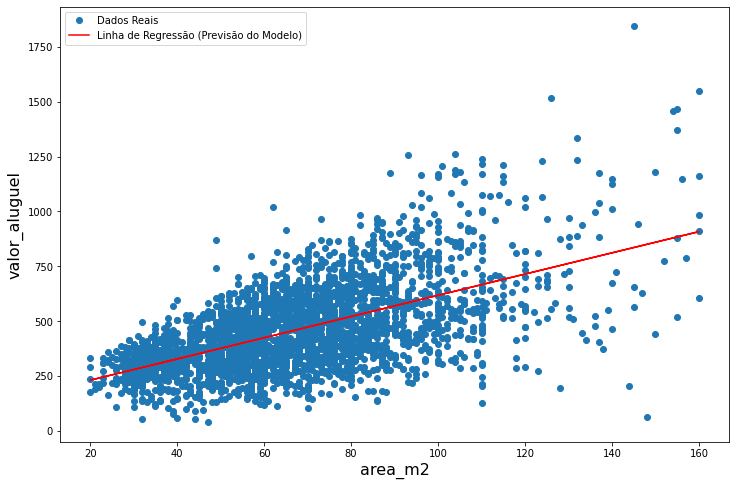

In [27]:
# Plot
plt.figure(figsize = (12, 8))
plt.xlabel('area_m2', size = 16)
plt.ylabel('valor_aluguel', size = 16)
plt.plot(X['area_m2'], y, "o", label = 'Dados Reais')
plt.plot(X['area_m2'], resultado.fittedvalues, 'r-', label = 'Linha de Regressão (Previsão do Modelo)')
plt.legend(loc = 'best')
plt.show()

### Conclusão

R² = 0.34 não é suficiente ára explicar a variação no valor do aluguel, pois o nosso modelo obteve um coef de determinação muito pqn.

# FIM
## Thanks a Loooooot
### Visite o Blog da DSA